In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns

## Loading data

In [2]:
df = pd.read_csv('../KNN/Data-Mushroom/mushrooms.csv', skiprows=2)

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Preprocessing

In [4]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [5]:
columns = [col for col in df.columns if df[col].nunique() > 2]
target = 'class'
removed_columns_len = len(df.columns) - len(columns)
print(f"Removed columns: {removed_columns_len}")

Removed columns: 7


/var/folders/fy/_wgctw0x6rx_spfqk5n2gq4w0000gn/T/ipykernel_28596/1840208617.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));


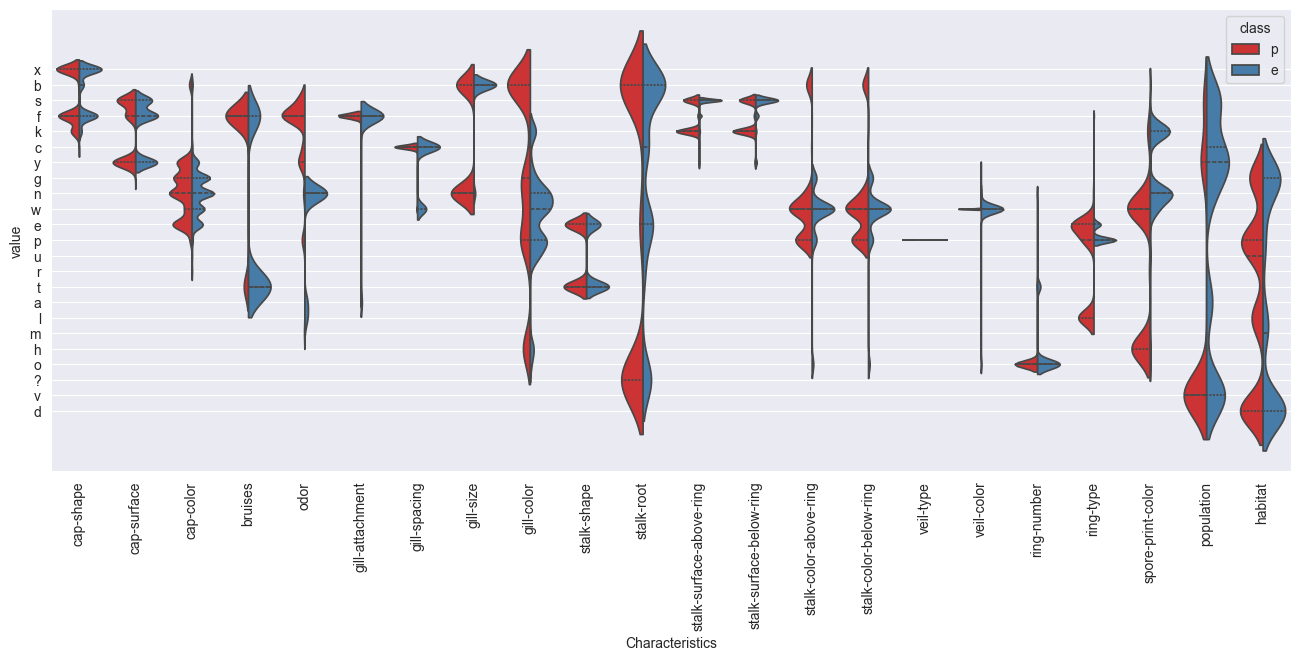

In [6]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))

p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1', density_norm = 'count')
df_no_class = df.drop(["class"],axis = 1)

p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

In [7]:
X = df[columns]
y = df[target]
label_encoder = LabelEncoder()
X = X.apply(label_encoder.fit_transform)
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)

## Train tree model

In [8]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## Evaluate tree model

In [9]:
y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[418   1]
 [ 32 362]]
Accuracy: 0.959409594095941


[Text(0.5, 0.875, 'x[4] <= 3.5\ngini = 0.499\nsamples = 7311\nvalue = [3789, 3522]'),
 Text(0.25, 0.625, 'x[14] <= 3.5\ngini = 0.28\nsamples = 2996\nvalue = [504, 2492]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[13] <= 1.5\ngini = 0.211\nsamples = 534\nvalue = [470, 64]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 44\nvalue = [0, 44]'),
 Text(0.1875, 0.125, 'gini = 0.078\nsamples = 490\nvalue = [470, 20]'),
 Text(0.375, 0.375, 'x[5] <= 2.0\ngini = 0.027\nsamples = 2462\nvalue = [34, 2428]'),
 Text(0.3125, 0.125, 'gini = 0.009\nsamples = 2439\nvalue = [11.0, 2428.0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(0.75, 0.625, 'x[13] <= 1.5\ngini = 0.363\nsamples = 4315\nvalue = [3285, 1030]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= 3.5\ngini = 0.2\nsamples = 622\nvalue = [70, 552]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 552\nvalue = [0, 552]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 70\nvalue = [70, 0]'),
 Text(

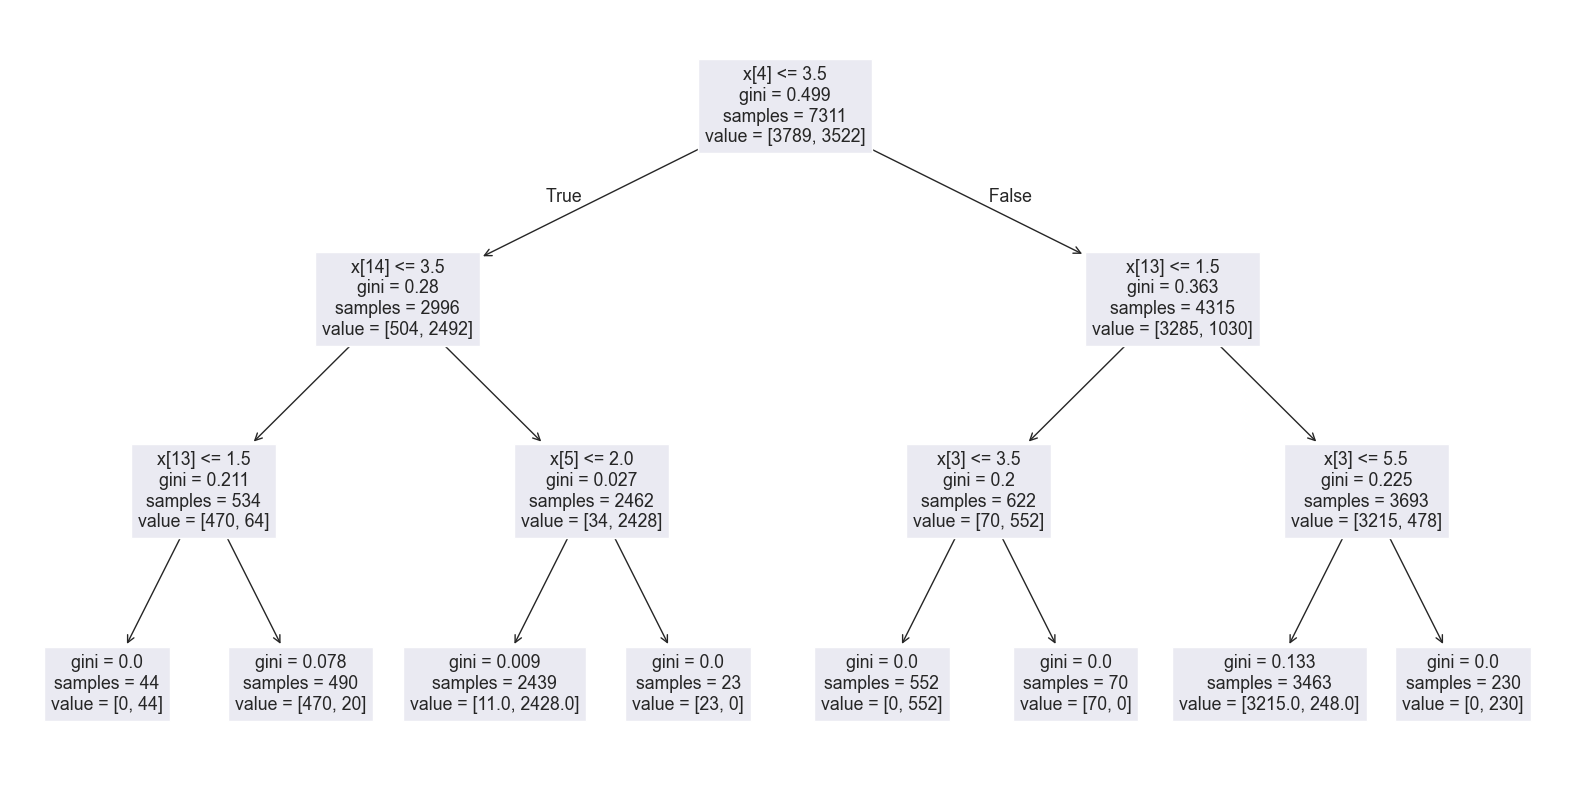

In [10]:
plt.figure(figsize=(20,10))
plot_tree(classifier)